In [463]:
import pandas as pd
import numpy as np

### Cleaning Up the Data ###

In [464]:
df = pd.read_csv(r'C:\Users\royha\Documents\Uni\SimData\pandas\train\7571\SimpleTest\12.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          422 non-null    object 
 1    Y         420 non-null    float64
 2    Pressure  420 non-null    float64
 3    TiltX     420 non-null    float64
 4    TiltY     420 non-null    float64
 5    Time      420 non-null    object 
dtypes: float64(4), object(2)
memory usage: 19.9+ KB


In [465]:
df = df.drop(' TiltX', axis=1)
df = df.drop(' TiltY', axis=1)
df

,X,Y,Pressure,Time
0,278.0175,320.593333,0.415527,00:04.8011799
1,280.0125,321.606667,0.441162,00:04.8011799
2,280.44,321.986667,0.420166,00:04.8228373
3,283.29,324.646667,0.343506,00:04.8228373
4,283.7175,324.900000,0.366455,00:04.8384584
...,...,...,...,...
417,552.7575,468.413333,0.748779,00:23.6034386
418,552.9,468.540000,0.739502,00:23.6190650
419,553.755,469.300000,0.707520,00:23.6190650
420,Time Elapsed till drawing started: 00:04.8011799,NaN,NaN,NaN


In [466]:
timestamps = df.iloc[-2:]
df = df.iloc[:-2]

In [467]:
df['X'] = df['X'].astype('float64')

def parse(x):
    return float(str(x).split(':')[0])*100 + float(str(x).split(':')[1])

df[' Time'] = df[' Time'].apply(lambda x: parse(x))

C:\Users\royha\AppData\Local\Temp\ipykernel_24444\190974061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X'] = df['X'].astype('float64')
C:\Users\royha\AppData\Local\Temp\ipykernel_24444\190974061.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' Time'] = df[' Time'].apply(lambda x: parse(x))


In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          420 non-null    float64
 1    Y         420 non-null    float64
 2    Pressure  420 non-null    float64
 3    Time      420 non-null    float64
dtypes: float64(4)
memory usage: 13.2 KB


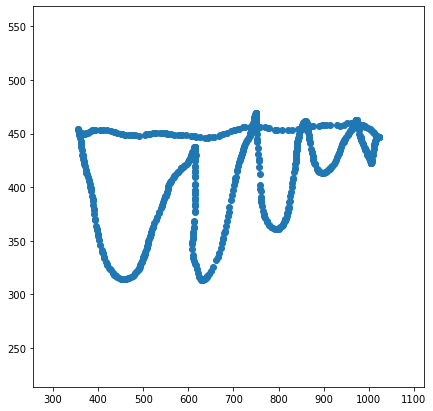

In [503]:
import matplotlib.pyplot as plt

def ShowImage(df):
    plt.figure(figsize=(7,7))
    plt.plot(df['X'], df[' Y'], 'o')
    plt.axis( (df['X'].min()-100, df['X'].max()+100, df[' Y'].min()-100, df[' Y'].max()+100) )

ShowImage(df)

### When did he lift his hand? ###

no pressure 0.
when time difference is big (~1s).

In [470]:
df.sort_values(' Time')

,X,Y,Pressure,Time
0,278.0175,320.593333,0.415527,4.801180
1,280.0125,321.606667,0.441162,4.801180
2,280.4400,321.986667,0.420166,4.822837
3,283.2900,324.646667,0.343506,4.822837
4,283.7175,324.900000,0.366455,4.838458
...,...,...,...,...
415,548.9100,465.246667,0.770508,23.580807
416,551.3325,467.146667,0.767578,23.603439
417,552.7575,468.413333,0.748779,23.603439
418,552.9000,468.540000,0.739502,23.619065


In [471]:
df[' Delta Time'] = df.diff()[' Time']
df[' Delta Time'][0] = 0
df[df[' Delta Time'] > 1]

C:\Users\royha\AppData\Local\Temp\ipykernel_24444\3533045673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' Delta Time'] = df.diff()[' Time']
C:\Users\royha\AppData\Local\Temp\ipykernel_24444\3533045673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' Delta Time'][0] = 0


,X,Y,Pressure,Time,Delta Time
109,462.840,311.980000,0.107178,8.267963,2.211356
236,561.735,373.793333,0.214355,14.268656,4.486799
303,370.785,313.246667,0.258545,22.246710,7.244952


Separation of the drawing into segments.

In [472]:
def SeparateToSessions(df):
    sessions = []
    temp_df = df.copy()

    previous_index = 0
    for index, row in df[df[' Delta Time'] > 1].iterrows():
        i = index - previous_index
        previous_index = index
        sessions.append( temp_df.iloc[:i,:].reset_index() )
        temp_df = temp_df.iloc[i:,:]
    sessions.append( temp_df.reset_index() )

    return sessions

sessions = SeparateToSessions(df)
len(sessions)

4

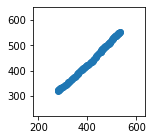

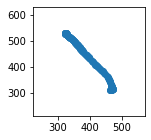

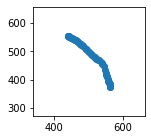

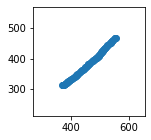

In [473]:
for i in range(0, len(sessions)):
    plt.figure(figsize=(2,2))
    plt.plot(sessions[i]['X'], sessions[i][' Y'], 'o')
    plt.axis( (sessions[i]['X'].min()-100, sessions[i]['X'].max()+100, sessions[i][' Y'].min()-100, sessions[i][' Y'].max()+100) )

### Lines. ###

In [563]:
import math

def GetAngle(start_point, end_point):
    return math.degrees( math.atan( (end_point[1] - start_point[1]) / (end_point[0] - start_point[0]) ) )

def IsNewLine(start_point, end_point, current_point):
    line_angle = GetAngle(start_point, end_point)
    start_to_current_angle =GetAngle(start_point, current_point)

    angle1 = abs(line_angle - start_to_current_angle)
    if angle1 > 90:
        angle1 = 180 - angle1

    if angle1 < 10:
        return False
    else:
        return True

def LineLengthAvgPressure(start, end, df):
    line_length = math.dist(start[0:1], end[0:1])
    avg_pressure = df.iloc[start[2]:end[2],:][' Pressure'].mean()
    return (line_length, avg_pressure, start, end)

In [516]:
def GetLines(sessions):
    count = 0
    lines = []

    for session_df in sessions:
        count += 1

        start = (session_df['X'][0], session_df[' Y'][0], 0)
        end = (session_df['X'][1], session_df[' Y'][1], 1)

        for i in range(2, len(session_df.index)):
            current = (session_df['X'][i], session_df[' Y'][i], i)
            if IsNewLine(start, end, current):
                count += 1
                start = end
                end = current
                
                lines.append( LineLengthAvgPressure(start, end, session_df) )
            else:
                end = current

        lines.append( LineLengthAvgPressure(start, end, session_df) )

    return lines

def PrintLines(lines):
    i = 0
    for line in lines:
        print('Line #{}. Length {:.3f} pixels. Average Pressure {:.3f}. Start (x): {:.3f}. End (x): {:.3f}'.format(i, line[0], line[1], line[2][0], line[3][0]))
        i+=1
    print('Hand was lifted {} times.'.format(len(sessions)))

lines = GetLines(sessions)
PrintLines(lines)

Line #0. Length 0.712 pixels. Average Pressure 0.300. Start (x): 1005.765. End (x): 1005.053
Line #1. Length 0.285 pixels. Average Pressure 0.301. Start (x): 1005.053. End (x): 1004.768
Line #2. Length 1.995 pixels. Average Pressure 0.706. Start (x): 1000.635. End (x): 1002.630
Line #3. Length 7.553 pixels. Average Pressure 0.662. Start (x): 1000.635. End (x): 1008.188
Line #4. Length 0.997 pixels. Average Pressure 0.254. Start (x): 790.163. End (x): 791.160
Line #5. Length 1.425 pixels. Average Pressure 0.265. Start (x): 791.160. End (x): 792.585
Line #6. Length 36.907 pixels. Average Pressure 0.684. Start (x): 791.160. End (x): 754.253
Hand was lifted 2 times.


### Is the shape open or closed? ###
We will search for a loop.

In [476]:
def ccw(A,B,C):
    return (C[1]-A[1]) * (B[0]-A[0]) > (B[1]-A[1]) * (C[0]-A[0])

def DoesIntersect(A,B,C,D):
    return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)

def Intersections(sline, lines):
    arr = []
    for line in lines:
        if DoesIntersect(sline[2], sline[3], line[2], line[3]):
            arr.append(1)
        else:
            arr.append(0)
    return arr

def GetIntersection(lines):
    Intersection = pd.DataFrame()
    for i in range(0, len(lines)):
        Intersection['{}'.format(i)] = Intersections(lines[i], lines)
    return Intersection

Intersection = GetIntersection(lines)

In [477]:
def CheckIntersection(Intersection, lines, start, current, previous=start):
    if start == current:
        return True
    else:
        ret = False
        for index, row in Intersection[Intersection['{}'.format(current[4])] == 1].iterrows():
            line = lines[index]
            if line == previous:
                continue
            ret = ret or CheckIntersection(Intersection, lines, start, line, current)
        return ret

def IsClosed(Intersection, lines):
    for start_line in lines:
        if len(Intersection[Intersection['{}'.format(start_line[4])] == 1].index) < 2:
            continue
        else:
            for index, row in Intersection[Intersection['{}'.format(start_line[4])] == 1].iterrows():
                line = lines[index]
                if CheckIntersection(Intersection, lines, start_line, line):
                    return True
    return False

In [478]:
def IndexLines(lines):
    ret = []
    i = 0
    for line in lines:
        ret.append(line + (i,))
        i += 1
    return ret

In [479]:
IsClosed(Intersection, IndexLines(lines))

True

## More Examples ##

In [564]:
def LoadImage(path):
    df = pd.read_csv(path, sep=',')

    df = df.drop(' TiltX', axis=1)
    df = df.drop(' TiltY', axis=1)
    df = df.iloc[:-2]
    
    df['X'] = df['X'].astype('float64')
    df[' Time'] = df[' Time'].apply(lambda x: parse(x))

    df[' Delta Time'] = df.diff()[' Time']
    df[' Delta Time'][0] = 0

    df = df.sort_values(' Time')

    return df

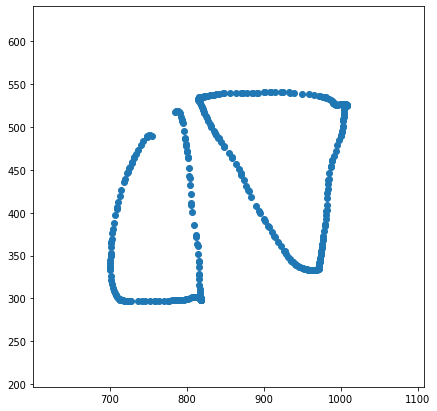

In [565]:
#df = LoadImage(r'C:\Users\royha\Documents\Uni\SimData\pandas\train\7573\SimpleTest\17.csv')
df = LoadImage(r'C:\Users\royha\Documents\Uni\SimData\pandas\train\7573\SimpleTest\20.csv')
ShowImage(df)

In [566]:
sessions = SeparateToSessions(df)
print('Number of times hand lifted: {}.'.format(len(sessions)-1))

Number of times hand lifted: 1.


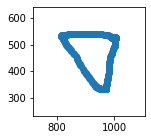

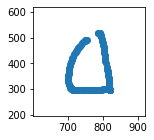

In [567]:
for i in range(0, len(sessions)):
    plt.figure(figsize=(2,2))
    plt.plot(sessions[i]['X'], sessions[i][' Y'], 'o')
    plt.axis( (sessions[i]['X'].min()-100, sessions[i]['X'].max()+100, sessions[i][' Y'].min()-100, sessions[i][' Y'].max()+100) )

In [568]:
lines = GetLines(sessions)
PrintLines(lines)

Line #0. Length 0.712 pixels. Average Pressure 0.300. Start (x): 1005.765. End (x): 1005.053
Line #1. Length 0.285 pixels. Average Pressure 0.301. Start (x): 1005.053. End (x): 1004.768
Line #2. Length 1.995 pixels. Average Pressure 0.706. Start (x): 1000.635. End (x): 1002.630
Line #3. Length 7.553 pixels. Average Pressure 0.662. Start (x): 1000.635. End (x): 1008.188
Line #4. Length 0.997 pixels. Average Pressure 0.254. Start (x): 790.163. End (x): 791.160
Line #5. Length 1.425 pixels. Average Pressure 0.265. Start (x): 791.160. End (x): 792.585
Line #6. Length 36.907 pixels. Average Pressure 0.684. Start (x): 791.160. End (x): 754.253
Hand was lifted 2 times.


In [570]:
Intersection = GetIntersection(lines)
print('Is there a closed shape: {}'.format( IsClosed(Intersection, IndexLines(lines)) ))

Is there a closed shape: False
